# Predicting Titanic Survivors Using a Neural Network

# 1. Importing Libraries 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# 2. Load the Titanic data

In [3]:
train_data = pd.read_csv('/kaggle/input/predictingtitanicsurvivorsusinganeuralnetworkmodel/train.csv')
test_data = pd.read_csv('/kaggle/input/predictingtitanicsurvivorsusinganeuralnetworkmodel/test.csv')


# 3.Exploratory Data Analysis (EDA)

In [4]:
# Quick look at the data
print("Train Data Info:")
print(train_data.info())
print("\nSample Data:")
print(train_data.head())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Sample Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0    

In [6]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


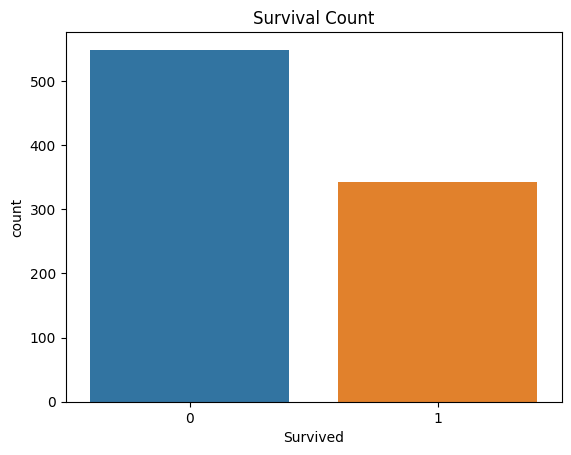

In [8]:
# Visualize the survival count
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Count')
plt.show()

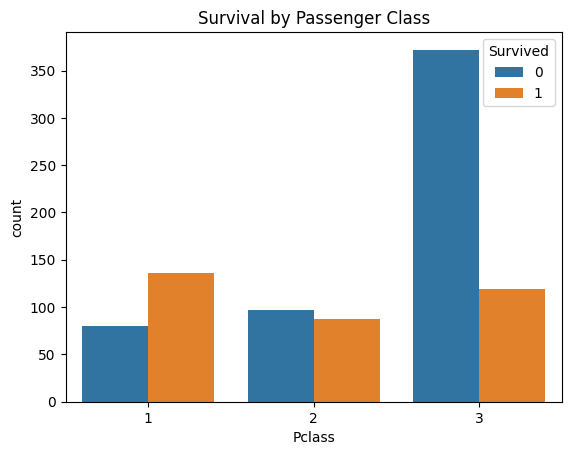

In [10]:
#Visualize survival by class
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


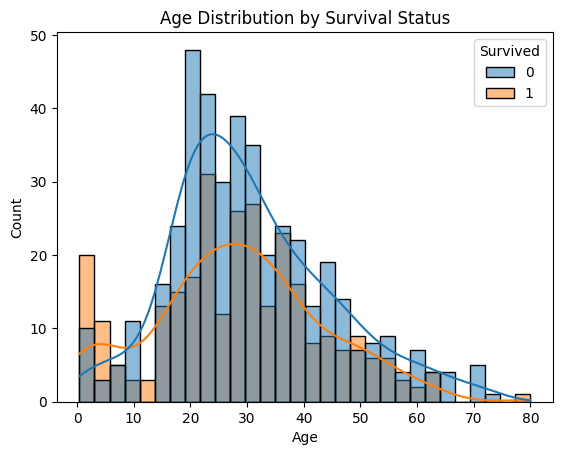

In [11]:
# Survival by age distribution
sns.histplot(train_data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()

# 4. Data Preprocessing

In [18]:
# Fill missing Age values with median
train_data = train_data.assign(Age=train_data['Age'].fillna(train_data['Age'].median()))
test_data = test_data.assign(Age=test_data['Age'].fillna(test_data['Age'].median()))

# Fill missing Embarked values with mode
train_data = train_data.assign(Embarked=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0]))
test_data = test_data.assign(Embarked=test_data['Embarked'].fillna(test_data['Embarked'].mode()[0]))

# Fill missing Fare values in test data with median
test_data = test_data.assign(Fare=test_data['Fare'].fillna(test_data['Fare'].median()))

# Encode categorical variables (Sex and Embarked)
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])


In [21]:
# Define features and target
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 5. Model Building

In [23]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=2)


Epoch 1/50
45/45 - 2s - 43ms/step - accuracy: 0.6882 - loss: 0.6092 - val_accuracy: 0.7654 - val_loss: 0.5204
Epoch 2/50
45/45 - 0s - 3ms/step - accuracy: 0.7837 - loss: 0.4995 - val_accuracy: 0.7933 - val_loss: 0.4535
Epoch 3/50
45/45 - 0s - 3ms/step - accuracy: 0.8034 - loss: 0.4628 - val_accuracy: 0.7989 - val_loss: 0.4352
Epoch 4/50
45/45 - 0s - 3ms/step - accuracy: 0.8202 - loss: 0.4402 - val_accuracy: 0.8045 - val_loss: 0.4250
Epoch 5/50
45/45 - 0s - 3ms/step - accuracy: 0.7992 - loss: 0.4392 - val_accuracy: 0.8045 - val_loss: 0.4210
Epoch 6/50
45/45 - 0s - 3ms/step - accuracy: 0.7949 - loss: 0.4336 - val_accuracy: 0.8045 - val_loss: 0.4196
Epoch 7/50
45/45 - 0s - 3ms/step - accuracy: 0.8118 - loss: 0.4320 - val_accuracy: 0.8101 - val_loss: 0.4184
Epoch 8/50
45/45 - 0s - 3ms/step - accuracy: 0.8132 - loss: 0.4270 - val_accuracy: 0.7989 - val_loss: 0.4157
Epoch 9/50
45/45 - 0s - 3ms/step - accuracy: 0.8244 - loss: 0.4150 - val_accuracy: 0.8045 - val_loss: 0.4207
Epoch 10/50
45/45 

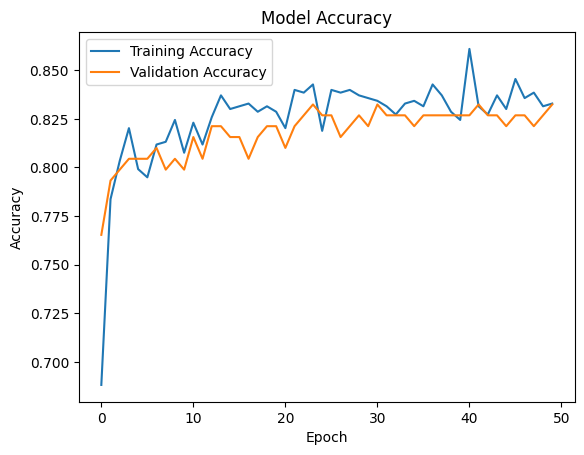

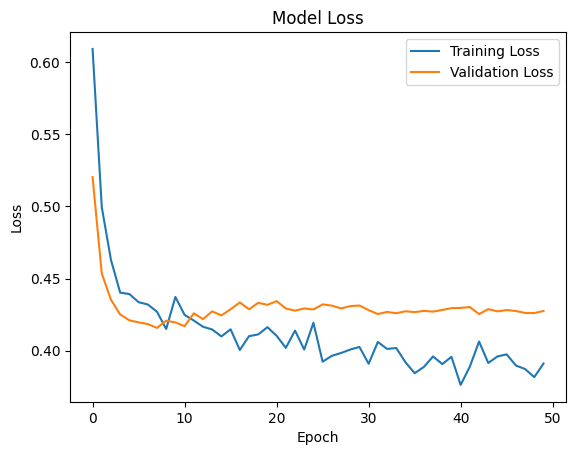

In [25]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# 6. Model Evaluation

In [26]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.83


# 7. Submission DataFrame

In [33]:
# Make predictions on test data
predictions = model.predict(test_data_scaled)
predictions = (predictions > 0.5).astype(int)

# Prepare submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions.flatten()
})

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [34]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 8. Submission file

In [35]:
submission.to_csv('submission.csv', index=False)
print("Submission file created!")

Submission file created!


In [37]:
import os

# List files in the current directory
print(os.listdir('.'))


['submission.csv', '.virtual_documents']
